In [1]:
import os
import glob
import json
import xml.etree.ElementTree as ET

import cv2
import pandas
import openslide
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt

from pyslide import slide, patching
from pyslide.utilities import mask2rgb

In [2]:
#asap_path='data/annotations/asap_annotations.xml'
#imagej_path='data/annotations/imagej_annotations.xml'
#json_path='data/annotations/json_annotations.json'
#csv_path='data/annotations/csv_annotations.csv'
#WSI_PATH='/Volumes/cancerbioin/barts/lymphnode-paper-set/2865 B2 LN.ndpi'
QUPATH_PATH='/Users/w2030634/Projects/PySlide/data/annotations/qupath.json'
WSI_PATH='2865 B2 LN.ndpi'

border:[(3981.0, 118531.0), (11202.0, 92659.0)]


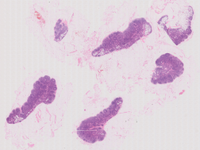

In [3]:
annotate=slide.Annotations([QUPATH_PATH],source="qupath",labels=['sinus','follicle','germinal centre'])
wsi=slide.Slide(WSI_PATH,mag=0,annotations=annotate)
mask=wsi.slide_mask
print('border:{}'.format(wsi.get_border()))
wsi.get_thumbnail((200,200))

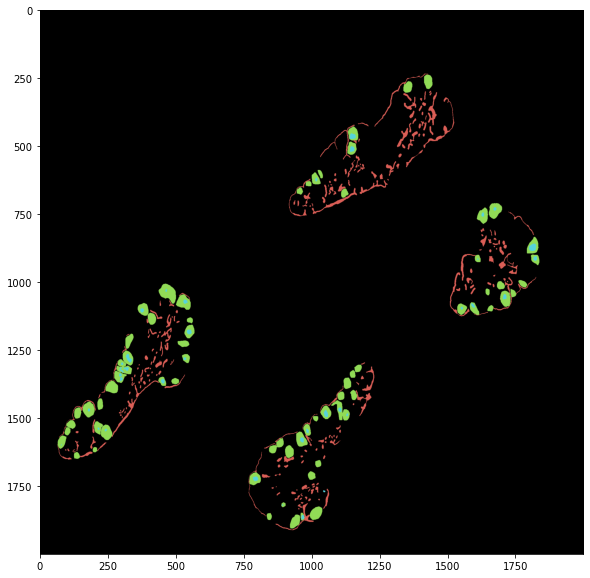

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(mask)

### Resize border 

In [5]:
print('border:{}'.format(wsi.get_border()))
borders=wsi.get_border()
x_new=wsi.resize_border(borders[0][0],factor=32)
x_new

border:[(3981.0, 118531.0), (11202.0, 92659.0)]


4000

### Detect components

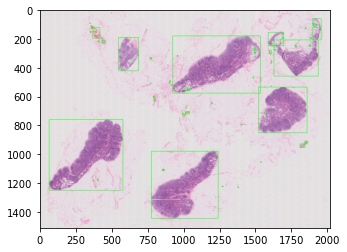

In [6]:
img,borders=wsi.detect_components()
plt.imshow(img[-1])

### Generate region

In [19]:
wsi.dimensions
border=borders[14]
(x1,x2),(y1,y2)=border
border

[(4032, 36864), (48576, 17152)]

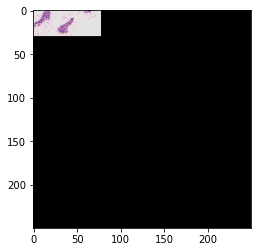

In [22]:
wsi2=openslide.OpenSlide(WSI_PATH)
region=wsi2.read_region((4032,48576),3,(50000,50000))
region_new=cv2.resize(np.array(region.convert('RGB')),(250,250))
plt.imshow(region_new)

In [ ]:
region=wsi.generate_region(mag=3,x=(x1,x2),y=(y1,y2),x_size=50000,y_size=50000)
plt.imshow(region[0])

## Patching

In [4]:
patch=patching.Patching(wsi,mag_level=3,size=(1024,1024))
print(patch)
#patch.save('images',mask_flag=True)

num patches: 96
{'name': '2865 B2 LN.ndpi', 'mag': 3, 'size': (1024, 1024), 'step': 1024, 'border': [(3981.0, 118531.0), (11202.0, 92659.0)], 'mode': None, 'number': 96}


### filter patches

Num removed: 73
Remaining:23


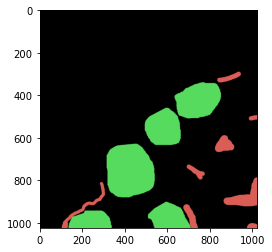

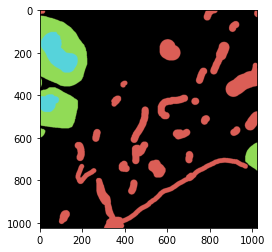

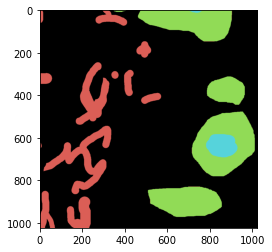

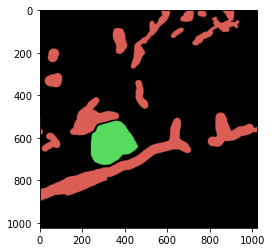

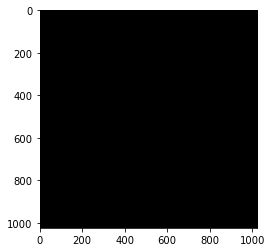

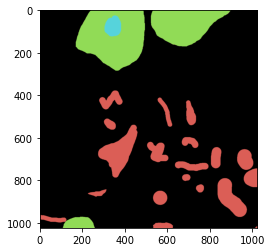

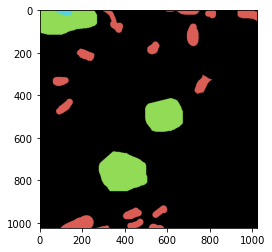

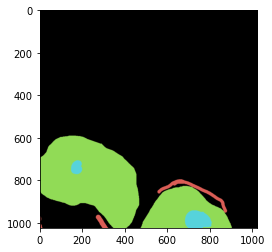

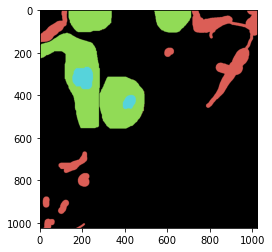

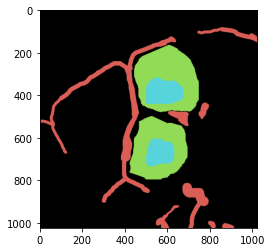

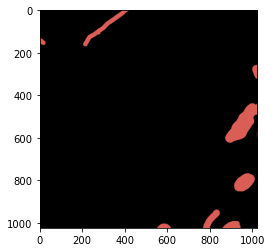

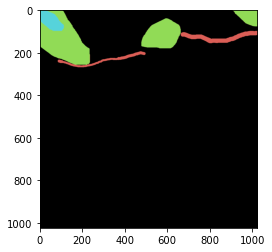

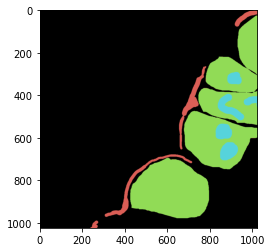

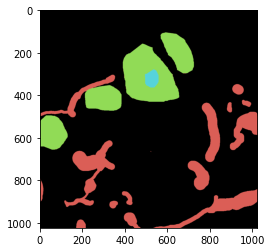

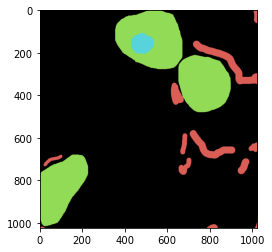

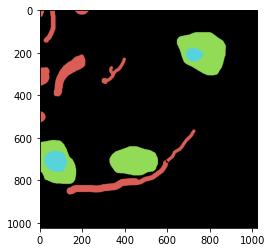

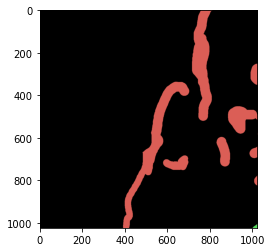

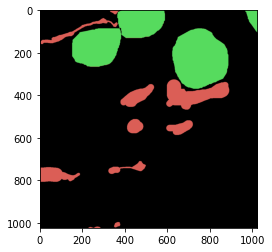

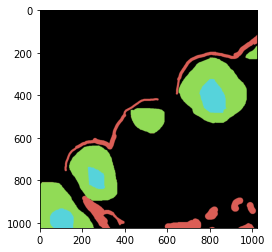

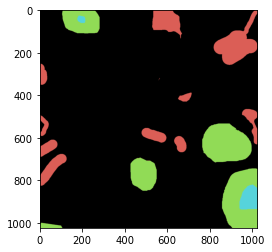

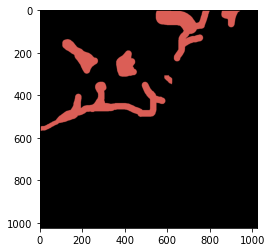

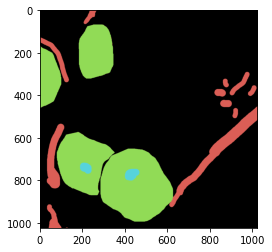

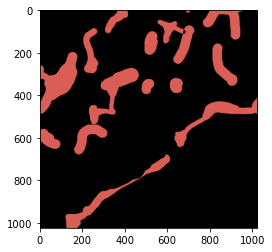

In [5]:
patch.filter_patches(210)
patch.save('images',mask_flag=True)
masks=glob.glob('images/masks/*')
for m in masks:
    mask=cv2.imread(m)
    mask=mask2rgb(mask[:,:,0])
    plt.imshow(mask)
    plt.show()

### Get labels

In [6]:
patch.generate_labels(0.5)

TypeError: '>' not supported between instances of 'int' and 'NoneType'

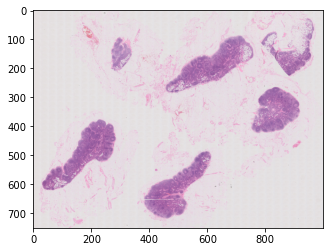

(<AxesSubplot:>,
 [<matplotlib.lines.Line2D at 0x15ff9b4f0>])

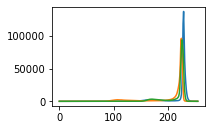

In [24]:
image=np.array(wsi.get_thumbnail((1000,1000)))
plt.imshow(image)
plt.show()
hist1 = cv2.calcHist([image],[0],None,[256],[0,256])
hist2 = cv2.calcHist([image],[1],None,[256],[0,256])
hist3 = cv2.calcHist([image],[2],None,[256],[0,256])
plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)

### Stitching

In [13]:
path='images/images'
s=patching.Stitching(path,name='2865 B2 LN.ndpi',mag_level=3)
print('patch step {}'.format(s.step))

found 96 patches
border [[12173, 102285], [19394, 76738]]
patch step 1024


In [14]:
image=s.stitch()

2865 B2 LN.ndpi_12173_19394.png
2865 B2 LN.ndpi_12173_27586.png
2865 B2 LN.ndpi_12173_35778.png
2865 B2 LN.ndpi_12173_43970.png
2865 B2 LN.ndpi_12173_52162.png
2865 B2 LN.ndpi_12173_60354.png
2865 B2 LN.ndpi_12173_68546.png
2865 B2 LN.ndpi_12173_76738.png
2865 B2 LN.ndpi_20365_19394.png
2865 B2 LN.ndpi_20365_27586.png
2865 B2 LN.ndpi_20365_35778.png
2865 B2 LN.ndpi_20365_43970.png
2865 B2 LN.ndpi_20365_52162.png
2865 B2 LN.ndpi_20365_60354.png
2865 B2 LN.ndpi_20365_68546.png
2865 B2 LN.ndpi_20365_76738.png
2865 B2 LN.ndpi_28557_19394.png
2865 B2 LN.ndpi_28557_27586.png
2865 B2 LN.ndpi_28557_35778.png
2865 B2 LN.ndpi_28557_43970.png
2865 B2 LN.ndpi_28557_52162.png
2865 B2 LN.ndpi_28557_60354.png
2865 B2 LN.ndpi_28557_68546.png
2865 B2 LN.ndpi_28557_76738.png
2865 B2 LN.ndpi_36749_19394.png
2865 B2 LN.ndpi_36749_27586.png
2865 B2 LN.ndpi_36749_35778.png
2865 B2 LN.ndpi_36749_43970.png
2865 B2 LN.ndpi_36749_52162.png
2865 B2 LN.ndpi_36749_60354.png
2865 B2 LN.ndpi_36749_68546.png
2865 B2 

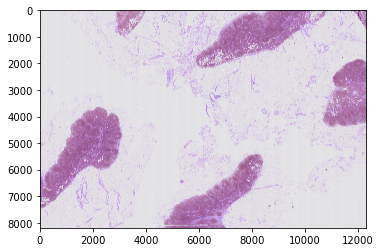

In [15]:
plt.imshow(image)